In [1]:
import pandas as pd
from PIL import Image
from IPython.display import clear_output
import numpy as np
import os

In [17]:
# stay inside the resources directory and everything works fine
# otherwise:
# os.chdir('/Users/elisamatteligh/Desktop/UNI/Vision/Vision_Project/GeoEstimation/resources')

In [2]:
personal_path_imdir = '/Users/elisamatteligh/Desktop/UNI/Vision/'

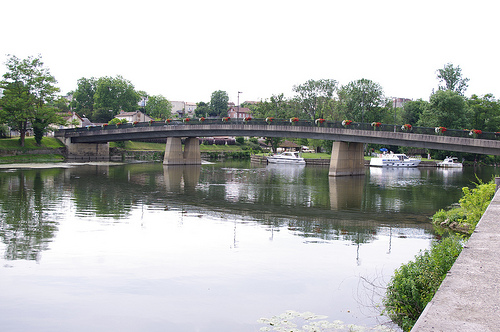

Valore  1 non localizzabile, 2 borderline, 3 localizzabile, 8 non disponibile: q


In [22]:
csv_file = "yfcc4k.csv"
im_ds = pd.read_csv(csv_file)
for i in range(im_ds.shape[0]):
    if np.isnan(im_ds.loc[i,'LOC']):
        image = im_ds.loc[i]['IMG_ID']
        path = personal_path_imdir + "yfcc4k/{}".format(image)
        view_im = Image.open(path)
        view_im.thumbnail([800, 400])
        display(view_im)
        localizzabile = input("Valore  1 non localizzabile, 2 borderline, 3 localizzabile, 8 non disponibile: ")
        while localizzabile not in ['1','2','3','8','q']:
            localizzabile = input("Prego inserire 1, 2 o 3 (o q per quit). Riprova: ")
        if localizzabile == 'q':
            break
        im_ds.loc[i,'LOC']=int(localizzabile)-1
        clear_output(wait=True)

# to save results on the csv file!
im_ds.to_csv(path_or_buf=csv_file, index=False, sep=',')

Come classificare le foto:

- classe 0:
    - luoghi,soggetti, oggetti privati (un piatto di pasta, una persona dentro, una stanza di albergo senza tratti particolari)
    - foto non rappresentati luoghi (foto di un disegno, di un volantino, ...)
    - foto in cui rimossi tutti gli oggetti mobili, la scena non ha nessun carattereo segno specifico (mare, deserto, pratone)
    - primi piani di cose generiche
    - foto sfocate o troppo strane
    - foto dell'interno di mezzi di locomozione

- classe 1:
    - tutto ciò che non è in 0 nè in 2
    - stadi, palestre, areoporti edifici molto comuni

- classe 2:
    - foto di monumenti, edifici, opere d'arte, paesaggi famosi
    - paesaggi e skylines ben definiti e con sufficiente variabilità (profilo di una montagna, )
    - foto di scritte non mobili (cartelli, insegne, lapidi)
    - foto urbane sufficientemente dettagliate, dettagli non motevoli, non monotone
    
    
--> In dubbio: per eccesso

In [23]:
# Conta il numero di righe senza NaN
num_righe = im_ds.notna().sum()[2]

print("Sono state classificate {} immagini.".format(num_righe))

Sono state classificate 1534 immagini.


In [ ]:
# cells for the creation of the csv, do NOT execute again

In [ ]:
import pandas as pd

# Crea un dataframe vuoto con una sola colonna
df = pd.DataFrame(columns=['colonna'])

# Itera su una lista di elementi e aggiungi ogni elemento alla colonna del dataframe
for elemento in lista_elementi:
    df = df.append({'colonna': elemento}, ignore_index=True)


In [11]:
os.chdir('/Users/elisamatteligh/Desktop/UNI/Vision')
yfcc4k_df = pd.DataFrame()
yfcc4k_df['IMG_ID'] = []
path = "yfcc4k"
os.chdir(path)
for image in os.listdir():
    yfcc4k_df = yfcc4k_df.append({'IMG_ID': image}, ignore_index=True)

In [12]:
yfcc4k_df['LOC'] = np.nan

In [14]:
fout = '/Users/elisamatteligh/Desktop/UNI/Vision/Vision_Project/GeoEstimation/resources/yfcc4k.csv'
yfcc4k_df.to_csv(fout)